# Dataset Description 

The dataset taken from the UCI Machine Learning repository contains medical measurements for patients who suffer from some form of heart disease (`target` = 1, 2, 3, 4), or who have not been diagnosed with heart disease (`target` = 0).

The data is collected from a total of 4 locations:
     1. Cleveland Clinic Foundation (cleveland.csv)
     2. Hungarian Institute of Cardiology, Budapest (hungary.csv)
     3. V.A. Medical Center, Long Beach, CA (va.csv)
     4. University Hospital, Zurich, Switzerland (switzerland.csv)

A summary of the attributes:

| Description         | Variable        | Values             | Type    | 
|:-------------------:|:---------------:|:------------------:| :-----: | 
| age                 | age in years    | n/a                | numeric (`float64`) | `int` |
| sex                 | patient gender  | 1: male, 0: female | categorical | `int` |
| chest_pain          | chest pain type | 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic | categorical | `int` |
| rest_blood_pressure | resting blood pressure in mm Hg | n/a | numeric (`float64`) | `float` |
| cholestorol         | serum cholestoral in mg/dl      | n/a | numeric (`float64`) | `float` |
| fast_blood_sugar    | fasting blood sugar > 120 mg/dl | 1: true, 0: false | categorical | `int` |
| rest_ecg            | ecg signal at rest | 0: normal, 1: having ST-T wave abnormality, 2: left ventricular hypertrophy | categorical | `int` |
| max_heart_rate      | maximum heart rate achieved     | n/a | numeric (`float64`) | `float` |
| exercise_angina     | exercise induced angina         | 1: yes, 0: no | categorical | `int` |
| st_depression       | ST depression induced by exercise relative to rest | n/a | numeric (`float64`) | `float` |
| st_slope            | the slope of the peak exercise ST segment | 1: upsloping, 2: flat, 3: downsloping | categorical | `int` |
| major_vessels       | number of major vessels | 0-3: colored by flourosopy | numeric (`float64`) | `int` |
| thal                | n/a | 3: normal, 6: fixed defect, 7: reversable defect | categorical | `int` |
| target              | diagnosis of heart disease | 0: false, 1: true | categorical | `int` |

# Preprocessing the data

In general, real world datasets tend to be:
- **Incomplete**: lacking attribute values, lacking certain attributes of interest, or containing only aggregate data
- **Noisy**: containing errors or outliers
- **Inconsistent**: containing discrepancies in codes or names
   
These inconsistencies must be handled carefully to achieve the most accuracy and reliability possible when training the final model. The data importing, wrangling and consolidation phase will be carried out below, and will aim to:
- Import the 4 datasets and resolve any inconsistencies between them
- Fill in missing values with a "best guess" approach using the `mean` and `mode` (described in detail later)
- Establish data types
- Identify and remove outliers

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Reading in the data
The data is read in from 4 separate files:
- cleveland.csv
- hungary.csv
- switzerland.csv
- va.csv

Missing values are marked as either `?` or `-9`.

In [3]:
names=['age', 'sex', 'chest_pain', 'rest_blood_pressure', 'cholestorol', 'fast_blood_sugar', 'rest_ecg', 'max_heart_rate', 'exercise_angina', 'st_depression', 'st_slope', 'major_vessels', 'thal', 'target']
files = ['cleveland.csv', 'hungary.csv', 'switzerland.csv', 'va.csv']

# Read in the files as a single dataframe
dfs = (pd.read_csv(f, names=names, na_values=['?', -9]) for f in files)
df = pd.concat(dfs, ignore_index=True)

# Display the first 10 records
df.head(5)

age  sex  chest_pain  rest_blood_pressure  cholestorol  fast_blood_sugar  \
0  63.0  1.0         1.0                145.0        233.0               1.0   
1  67.0  1.0         4.0                160.0        286.0               0.0   
2  67.0  1.0         4.0                120.0        229.0               0.0   
3  37.0  1.0         3.0                130.0        250.0               0.0   
4  41.0  0.0         2.0                130.0        204.0               0.0   

   rest_ecg  max_heart_rate  exercise_angina  st_depression  st_slope  \
0       2.0           150.0              0.0            2.3       3.0   
1       2.0           108.0              1.0            1.5       2.0   
2       2.0           129.0              1.0            2.6       2.0   
3       0.0           187.0              0.0            3.5       3.0   
4       2.0           172.0              0.0            1.4       1.0   

   major_vessels  thal  target  
0            0.0   6.0     0.0  
1            3.0   3.0     2.0  
2            2.0   7.0     1.0  
3            0.0   3.0     0.0  
4            0.0   3.0     0.0

### Correcting data types
The categorical variables are read in as `int64`s, so these should be changed to type `category`:

In [4]:
# Convert categorical variables
df[['sex', 'chest_pain', 'fast_blood_sugar', 'rest_ecg', 'exercise_angina', 'st_slope', 'major_vessels', 'thal', 'target']] = df[['sex', 'chest_pain', 'fast_blood_sugar', 'rest_ecg', 'exercise_angina', 'st_slope', 'major_vessels', 'thal', 'target']].astype('category')

In [5]:
df.dtypes

age                     float64
sex                    category
chest_pain             category
rest_blood_pressure     float64
cholestorol             float64
fast_blood_sugar       category
rest_ecg               category
max_heart_rate          float64
exercise_angina        category
st_depression           float64
st_slope               category
major_vessels          category
thal                   category
target                 category
dtype: object

## Data imputation

Imputation methods involve replacing missing values with estimated ones based on information available
in the data set [[1](http://www.aaai.org/Papers/KDD/1996/KDD96-023.pdf)]. There are multiple different options for filling in missing data, from naive methods such as the mean, to more robust prediction models like K-Nearest Neighbours.

Mean and mode imputation are some of the most frequently used methods for replacing missing data in Machine Learning problems. These mothods are based on filling in an unknown value by using the average of the known values for that attribute (quantitative), or simply filling it in using the most frequently occurring value of that attribute (qualitative).

In [6]:
print("Shape of the dataset:", df.shape)
df.isnull().sum()

Shape of the dataset: (921, 14)


age                      1
sex                      1
chest_pain               1
rest_blood_pressure     60
cholestorol             31
fast_blood_sugar        91
rest_ecg                 3
max_heart_rate          56
exercise_angina         56
st_depression           63
st_slope               310
major_vessels          611
thal                   487
target                   1
dtype: int64

### Observations
- Age and sex have very few missing records. These will be replaced with the mean of the dataset and the mode (the most frequent) respectively
- One record does not contain a `target` outcome (healthy or not healthy), so this can be removed
- `major_vessels` has the most amount of missing values, next to `thal`. These missing values are about a 2/3 of the length of the dataset, so the column could probably be dropped. For now however the values will be imputed.
- For other variables, it makes sense to fill the missing values with means and modes from a subset of similar patients. For example, an older patient is more likely to have a similar heart rate to another patient of similar age and gender, so it might not make sense to replace this value with the average of all of the patient's heart rates. 

Replacing the age and sex will be done using sklearn's `Imputer`:

In [7]:
from sklearn.preprocessing.imputation import Imputer 

mean_imputer = Imputer(missing_values='NaN', strategy='mean')
mode_imputer = Imputer(missing_values='NaN', strategy='most_frequent')

# Replace missing values in age with the mean
df['age'] = mean_imputer.fit_transform(df[['age']]) 

# Replace missing values in sex with the mode
df['sex'] = mode_imputer.fit_transform(df[['sex']]) 

For the other columns, replacing will be done by using the mean or mode of a subset of the data. 
Specific functions are defined for this purpose:

In [8]:
def impute_mean(attr):
    """
    Fill NaNs for numerical attributes with 
    the attribute mean of a subset of patients
    with similar age and sex. 
    """
    indices = df[df.loc[:, attr].isnull() == True].index

    for i in indices:
        # get age and sex for corresponding record
        age = df['age'].iloc[i]
        sex = df['sex'].iloc[i]

        # get a subset of patients within a similar range and sex
        subset = df[df['age'].between(age - 5, age + 5) & df['sex'] == sex]
        mean = subset[attr].mean() 
        
        # fill the record using the mean of attribute from the subset
        df[attr].fillna(mean, inplace=True)
        #df[attr] = mean_imputer.fit_transform(df[[attr]]) 
        
def impute_mode(attr):
    """
    Fill NaNs for categorical attributes with 
    the attribute mode of a subset of patients
    with similar age and sex. 
    """
    indices = df[df.loc[:, attr].isnull() == True].index

    for i in indices:
        # get age and sex for corresponding record
        age = df['age'].iloc[i]
        sex = df['sex'].iloc[i]

        # get a subset of patients within a similar range and sex
        subset = df[df['age'].between(age - 5, age + 5) & df['sex'] == sex]
        mode = subset[attr].mode()[0]
        
        # fill the record using the mean of attribute from the subset
        df[attr].fillna(mode, inplace=True)

In [9]:
# Fill missing values in numerical columns
nums = ['rest_blood_pressure', 'cholestorol', 'max_heart_rate', 'st_depression']
for i in nums:
    impute_mean(i)
    print("NaNs for", i, df[i].isnull().sum())
    
# Fill missing values in categorical columns
cats = ['chest_pain', 'fast_blood_sugar', 'rest_ecg', 'exercise_angina', 'st_slope', 'major_vessels', 'thal']
for i in cats:
    impute_mode(i)
    print("NaNs for", i, df[i].isnull().sum())
    
# Drop the record with a missing target
df.dropna(inplace=True)

NaNs for rest_blood_pressure 0
NaNs for cholestorol 0
NaNs for max_heart_rate 0
NaNs for st_depression 0
NaNs for chest_pain 0
NaNs for fast_blood_sugar 0
NaNs for rest_ecg 0
NaNs for exercise_angina 0
NaNs for st_slope 0
NaNs for major_vessels 0
NaNs for thal 0


All of the missing values have now been replaced:

In [10]:
df.isnull().sum()

age                    0
sex                    0
chest_pain             0
rest_blood_pressure    0
cholestorol            0
fast_blood_sugar       0
rest_ecg               0
max_heart_rate         0
exercise_angina        0
st_depression          0
st_slope               0
major_vessels          0
thal                   0
target                 0
dtype: int64

In [11]:
# Convert categorical variables
df[['sex', 'chest_pain', 'fast_blood_sugar', 'rest_ecg', 'exercise_angina', 'st_slope', 'major_vessels', 'thal', 'target']] = df[['sex', 'chest_pain', 'fast_blood_sugar', 'rest_ecg', 'exercise_angina', 'st_slope', 'major_vessels', 'thal', 'target']].astype('category')

## Categorical variables

In [12]:
print("Categories\n")
for i in (cats + ['target']):
    print(i, "\n", df[i].cat.categories.tolist())

Categories

chest_pain 
 [1.0, 2.0, 3.0, 4.0]
fast_blood_sugar 
 [0.0, 1.0]
rest_ecg 
 [0.0, 1.0, 2.0]
exercise_angina 
 [0.0, 1.0]
st_slope 
 [1.0, 2.0, 3.0]
major_vessels 
 [0.0, 1.0, 2.0, 3.0, 9.0]
thal 
 [3.0, 6.0, 7.0]
target 
 [0.0, 1.0, 2.0, 3.0, 4.0]


### Observations
- `target` is the outcome variable which dictates whether or not a patient is healthy (0), or have some form of cardiovascular disease (4 types in total: 1, 2, 3, 4). For the purpose of predicting whether or not a patient is at risk, only two should suffice (0 = healthy, 1 = at risk).
- Some categories contain `-9`, which is the equivalent to a missing value. These were converted to NaNs when the data was read in

In [13]:
# Replace the categories 1, 2, 3, 4 with just 1
df['target'] = df['target'].replace({0.0: 0, 1.0: 1, 2.0: 1, 3.0: 1, 4.0: 1}).astype('category')
df['target'].unique()

[0, 1]
Categories (2, int64): [0, 1]

# Exploring the data

In [14]:
df.describe()

age  rest_blood_pressure  cholestorol  max_heart_rate  \
count  920.000000           920.000000   920.000000      920.000000   
mean    53.510870           132.178155   198.702917      137.510776   
std      9.424685            18.444724   108.982529       25.138876   
min     28.000000             0.000000     0.000000       60.000000   
25%     47.000000           120.000000   177.750000      120.000000   
50%     54.000000           130.000000   221.000000      138.000000   
75%     60.000000           140.000000   267.000000      156.000000   
max     77.000000           200.000000   603.000000      202.000000   

       st_depression  
count     920.000000  
mean        0.883664  
std         1.053930  
min        -2.600000  
25%         0.000000  
50%         0.800000  
75%         1.500000  
max         6.200000

In [22]:
# 1 indicates the presence of heart disease
# 0 indicates that the patient is healthy
print("Healthy (0), Sick (1)")
print(df['target'].value_counts())

# 1 is male
# 0 is female 
print("\nFemale (0), Male (1)")
print(df['sex'].value_counts(), "\n")

# number of healthy/sick patients per gender
print("\nSex vs Diagnosed")
print(pd.crosstab(df['target'], df['sex']))

print("\nSex vs Diagnosed (probabilities)")
print(df[df['target'] == 1].sex.value_counts(normalize=True))

Healthy (0), Sick (1)
1    509
0    411
Name: target, dtype: int64

Female (0), Male (1)
1.0    726
0.0    194
Name: sex, dtype: int64 


Sex vs Diagnosed
sex     0.0  1.0
target          
0       144  267
1        50  459

Sex vs Diagnosed (probabilities)
1.0    0.901768
0.0    0.098232
Name: sex, dtype: float64


[Text(0.5,0,'ST depression')]

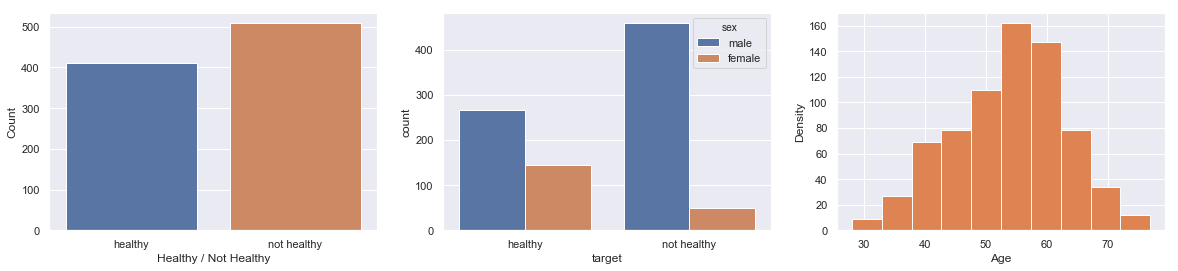

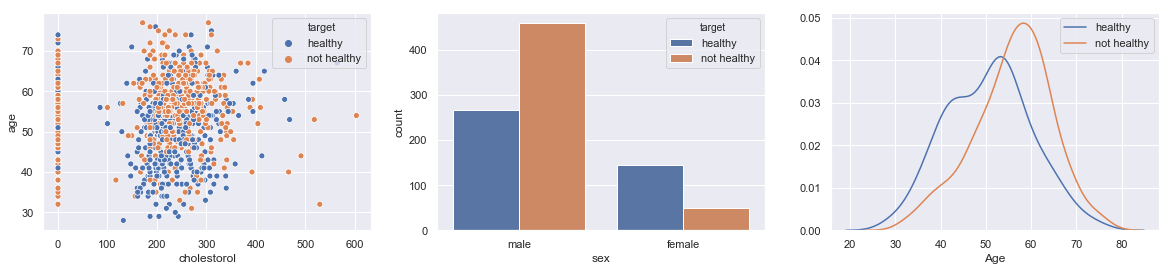

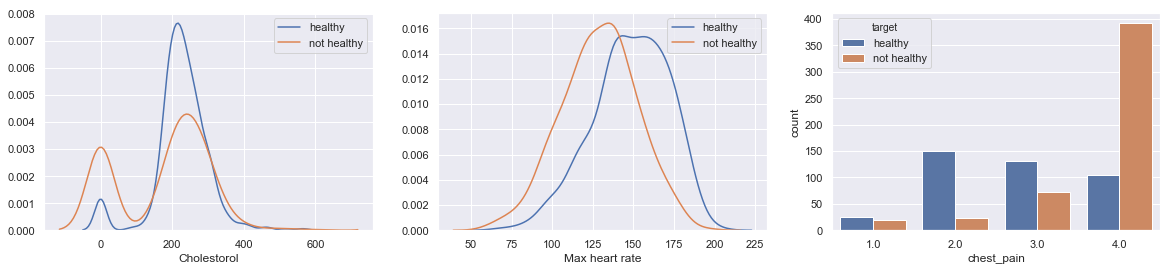

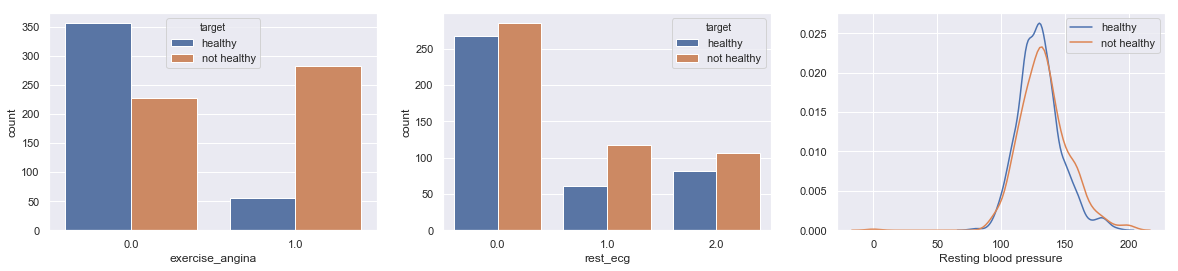

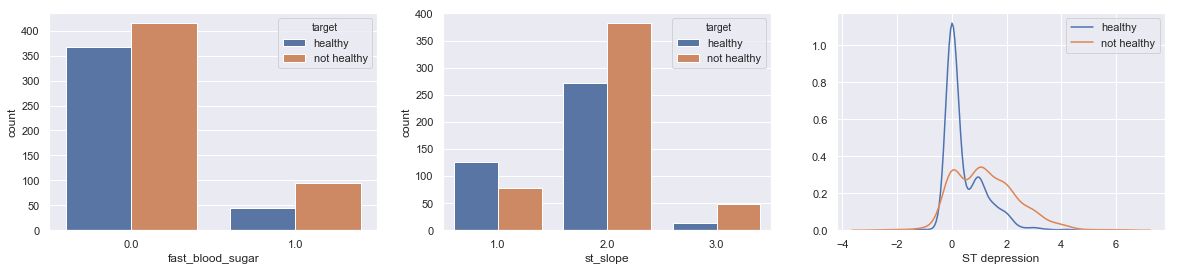

In [16]:
sns.set(palette="deep")

# Make a copy of the data to relabel the categories
data = df.copy()
data['sex'] = data['sex'].replace({0: 'female', 1: 'male'})
data['target'] = data['target'].replace({0: 'healthy', 1: 'not healthy'})

# -------------------------------------------------
# Row 1
# -------------------------------------------------
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))

# 0: Plot amount of healthy / sick patients
sns.countplot(x='target', data=data, ax=ax[0])
ax[0].set(xlabel='Healthy / Not Healthy', ylabel='Count')

# 1: Plot heart disease probability for gender
sns.countplot(x='target', hue="sex", data=data, ax=ax[1])

# 2: Plot age histogram
df.groupby('sex').age.hist()
ax[2].set(xlabel='Age', ylabel='Density')


# -------------------------------------------------
# Row 2
# -------------------------------------------------
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))

# Plot cholestorol distribution
# sns.distplot(df['cholestorol'], ax=ax[0])
sns.scatterplot(x="cholestorol", y="age", hue="target", data=data, ax=ax[0])

# Plot sex by healthy vs not healthy
sns.countplot(x='sex', hue="target", data=data, ax=ax[1])

# Plot age by healthy vs not healthy
sns.kdeplot(data.age[data.target == "healthy"], label='healthy', ax=ax[2])
sns.kdeplot(data.age[data.target == "not healthy"], label='not healthy', ax=ax[2])
ax[2].set(xlabel='Age')

# sns.barplot(x='sex', y='target', data=df)
# ax[1].set(xlabel='Sex', ylabel='Heart Disease')

# -------------------------------------------------
# Row 3
# -------------------------------------------------
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))

# Plot cholestorol by healthy vs not healthy
sns.kdeplot(data.cholestorol[data.target == "healthy"], label='healthy', ax=ax[0])
sns.kdeplot(data.cholestorol[data.target == "not healthy"], label='not healthy', ax=ax[0])
ax[0].set(xlabel='Cholestorol')

# Plot heart rate by healthy vs not healthy
sns.kdeplot(data.max_heart_rate[data.target == "healthy"], label='healthy', ax=ax[1])
sns.kdeplot(data.max_heart_rate[data.target == "not healthy"], label='not healthy', ax=ax[1])
ax[1].set(xlabel='Max heart rate')

# Plot chest pain by healthy vs not healthy
sns.countplot(x='chest_pain', hue="target", data=data, ax=ax[2])

# -------------------------------------------------
# Row 4
# -------------------------------------------------
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))

# Plot exercise chest pain by healthy vs not healthy
sns.countplot(x='exercise_angina', hue="target", data=data, ax=ax[0])

# Plot rest ecg by healthy vs not healthy
sns.countplot(x='rest_ecg', hue="target", data=data, ax=ax[1])

# Plot blood pressure by healthy vs not healthy
sns.kdeplot(data.rest_blood_pressure[data.target == "healthy"], label='healthy', ax=ax[2])
sns.kdeplot(data.rest_blood_pressure[data.target == "not healthy"], label='not healthy', ax=ax[2])
ax[2].set(xlabel='Resting blood pressure')

# -------------------------------------------------
# Row 4
# -------------------------------------------------
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))

# Plot fasting blood sugar by healthy vs not healthy
sns.countplot(x='fast_blood_sugar', hue="target", data=data, ax=ax[0])

# Plot st slope by healthy vs not healthy
sns.countplot(x='st_slope', hue="target", data=data, ax=ax[1])

# Plot st depression by healthy vs not healthy
sns.kdeplot(data.st_depression[data.target == "healthy"], label='healthy', ax=ax[2])
sns.kdeplot(data.st_depression[data.target == "not healthy"], label='not healthy', ax=ax[2])
ax[2].set(xlabel='ST depression')

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


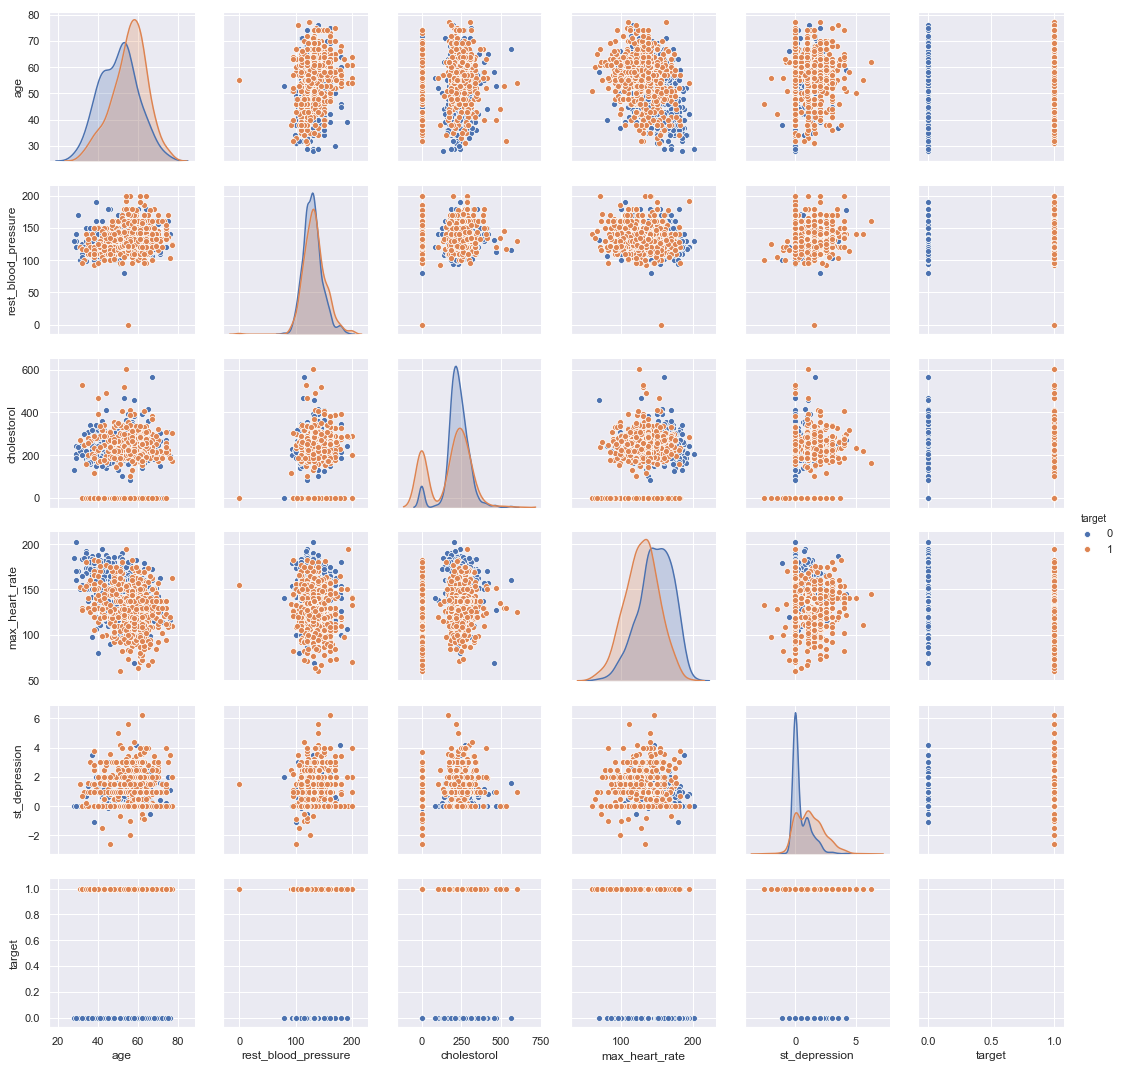

In [200]:
nums = df[['age', 'rest_blood_pressure', 'cholestorol', 'max_heart_rate', 'st_depression', 'target']]
sns.pairplot(nums, hue = 'target')

### Observations
- The average age of the observed patients is around `55`
- Men are more likely to be diagnosed with cardiovascular disease compared to women
- The majority of patients diagnosed with cardiovascular disease did not display symptoms of chest pain  
- Patients who were diagnosed with heart disease:
    - Are often male, around 55-60 in age
    - Displayed a higher peak in max heart rate achieved 
    - Displayed lower cholestorol levels in general (?)
    - Displayed symptoms of exercise enduced angina
- Plotting the cholestorol shows an unusual straight line - about 100-200 missing values for cholestorol are entered as 0 instead of NaN, so these values were not imputed. This will be fixed in the next step.

In [201]:
df['cholestorol'].replace(to_replace=0, value=np.nan, inplace=True)
print("NaNs before imputing", df['cholestorol'].isna().sum())

impute_mean('cholestorol')
print("NaNs after imputing", df['cholestorol'].isna().sum())

NaNs before imputing 172
NaNs after imputing 0


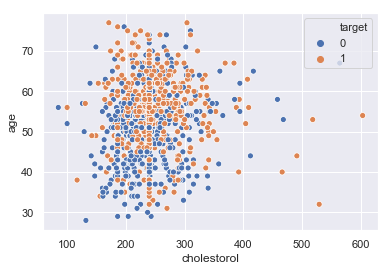

In [205]:
# Plot cholestorol distribution
sns.scatterplot(x="cholestorol", y="age", hue="target", data=df)

# Training the model
TO DO:
- Scale/normalise the data
- Feature subset selection
- Split into train/test/validation (or generate new data for testing)
- Build the models, iteratively tune the parameters 